# Importing Libraries and Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
import pylab as pl


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# file path
path = r'/Users/Evan/Desktop/MLB Team Stats Project'

In [6]:
# data
df_2 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'stl_hr_2.csv'))

In [7]:
# Data check
df_2.head()

Date  HR
0  2023-03-30   2
1  2023-03-31   0
2  2023-04-01   0
3  2023-04-02   4
4  2023-04-03   0

In [8]:
from datetime import datetime

df_2['datetime'] = pd.to_datetime(df_2['Date']) 
df_2['datetime'].asfreq('D')

1970-01-01   NaT
Freq: D, Name: datetime, dtype: datetime64[ns]

In [10]:
df_2 = df_2.drop(columns = 'Date')

In [11]:
df_2.head()

HR   datetime
0   2 2023-03-30
1   0 2023-03-31
2   0 2023-04-01
3   4 2023-04-02
4   0 2023-04-03

In [12]:
df_2= df_2.set_index('datetime')

# Step 4.

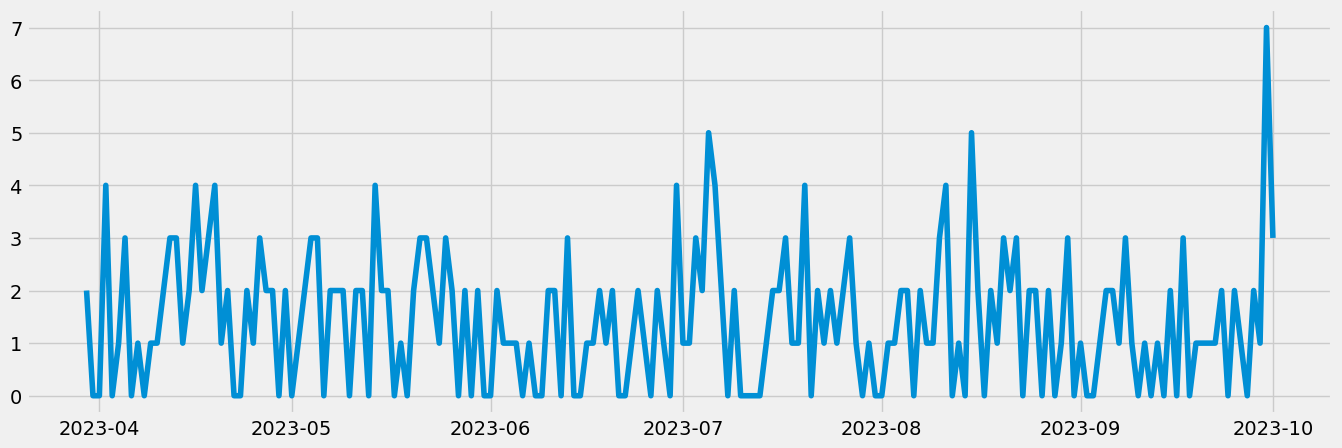

In [13]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_2)

# Step 5.

In [14]:
decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

In [15]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

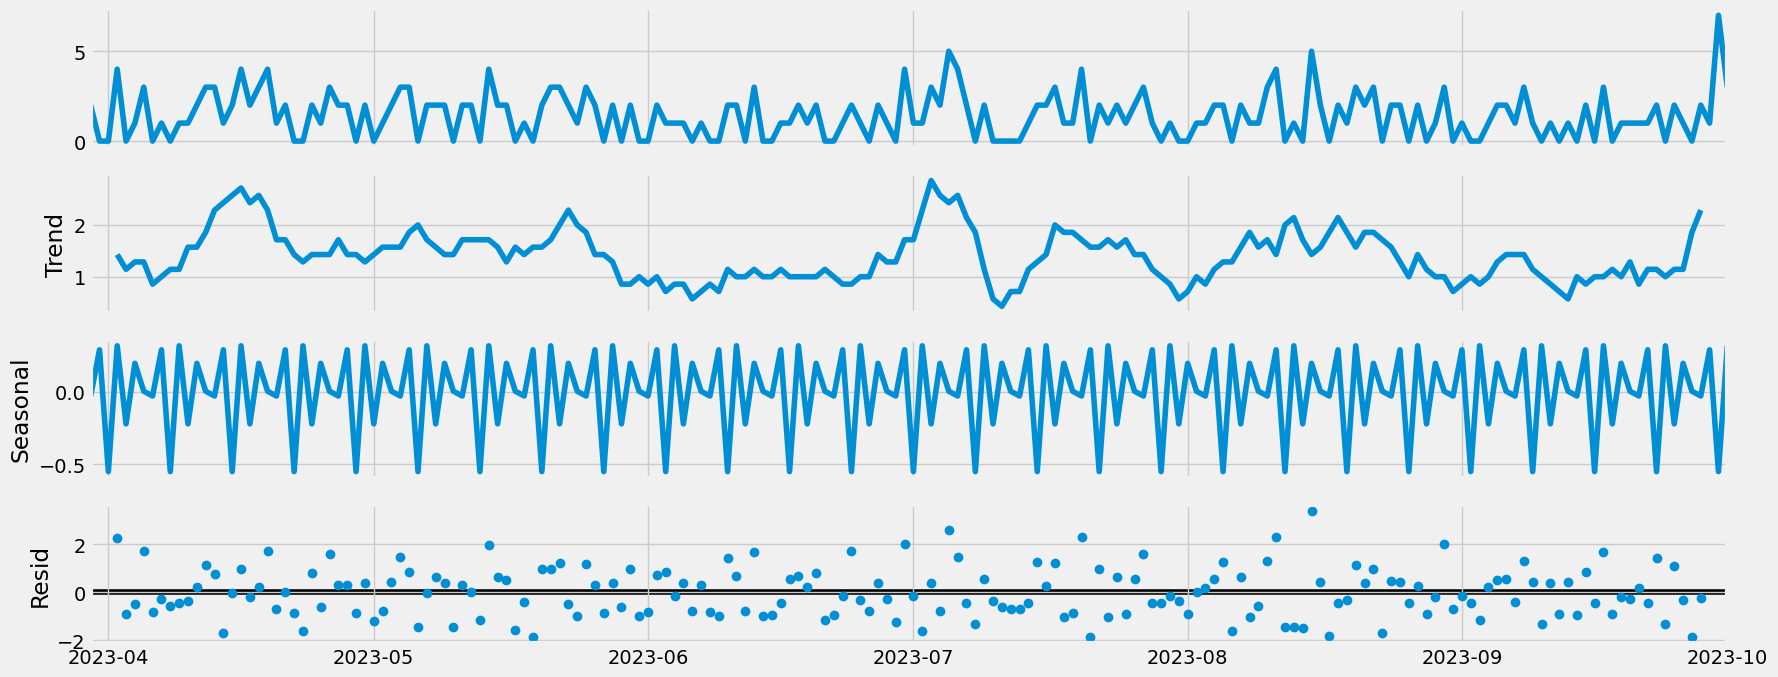

In [16]:
decomposition.plot()
plt.show()

There is a considerable amount of noise present in the decomposition. This can be attributed to the lack of a true trend as the number of homeruns hit each day fluctuates without much pattern. 

# Step 6.

In [17]:
from statsmodels.tsa.stattools import adfuller 

# defining dickey_fuller
def dickey_fuller(timeseries): 
  #printing results
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(df_2['HR'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.327991e+01
p-value                        7.729793e-25
Number of Lags Used            0.000000e+00
Number of Observations Used    1.850000e+02
Critical Value (1%)           -3.466201e+00
Critical Value (5%)           -2.877293e+00
Critical Value (10%)          -2.575168e+00
dtype: float64


The initial results show a test statistic that is larger than the critical value at all levels. The data is not yet stationary and cannot disprove that home runs are impacted by the time of the year the game is played. 

# Step 7.

In [18]:
# differencing data
data_diff = df_2 - df_2.shift(1)

In [20]:
# dropping any NaN values crated by differencing
data_diff.dropna(inplace = True)

In [21]:
# running dickey_fuller after differencing
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.913726e+00
p-value                        1.194156e-09
Number of Lags Used            9.000000e+00
Number of Observations Used    1.750000e+02
Critical Value (1%)           -3.468280e+00
Critical Value (5%)           -2.878202e+00
Critical Value (10%)          -2.575653e+00
dtype: float64


# Step 8.

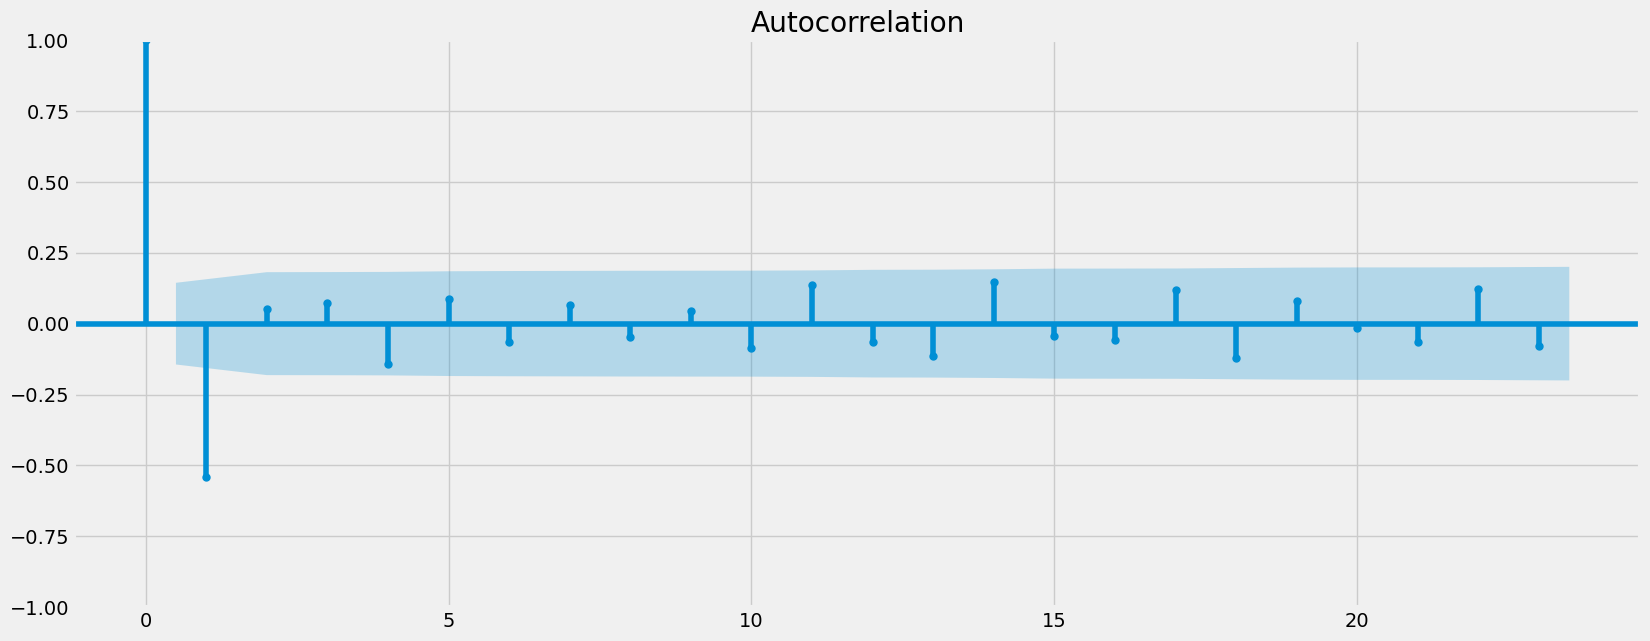

In [22]:
# importing statsmodel graphic for autocorrelation check

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plotting autocorrelation
plot_acf(data_diff)
plt.show()